In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import os

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
telco_data =pd.read_csv("TelcoCustomer_Churn.csv")


In [15]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors="coerce")

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
telco_data['TotalCharges'].dtype

dtype('float64')

In [23]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [25]:
telco_data['gender'].count()

7043

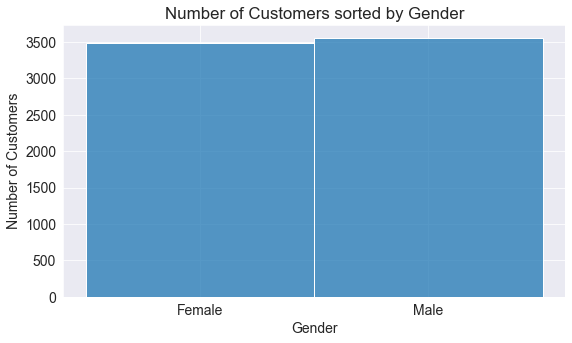

In [27]:
ax = sns.histplot(telco_data['gender'], stat='count', bins=72)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Number of Customers sorted by Gender')
plt.show()

In [35]:
telco_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [36]:
#Replacing values of SeniorCitizen with Yes and No
telco_data['SeniorCitizen'].replace(1,'Yes', inplace=True)
telco_data['SeniorCitizen'].replace(0,'No', inplace=True)
telco_data['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [29]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

a. Which 2 demographics have proven to be the most popular with the telco brand? 
   # female and male subscribers who are not senior citizens
b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?
  # Senior citizens

In [33]:
telco_data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [37]:
telco_data['Count'] = 1

In [38]:
df1 = telco_data[['gender', 'SeniorCitizen', 'Count']]
df1.groupby(['gender', 'SeniorCitizen']).count().reset_index()

,gender,SeniorCitizen,Count
0,Female,No,2920
1,Female,Yes,568
2,Male,No,2981
3,Male,Yes,574


Text(0, 0.5, 'No of subscribers')

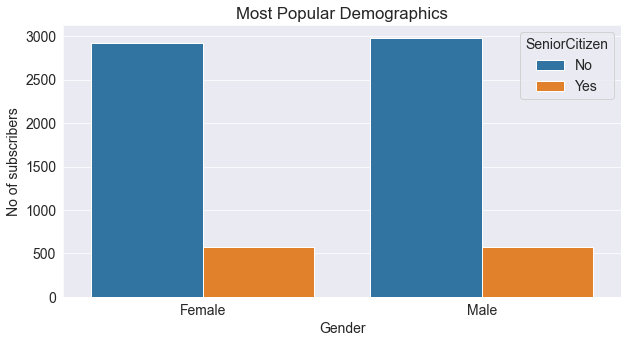

In [39]:
df_demo=telco_data.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y= "Count", hue="SeniorCitizen", data=df_demo)
plt.title("Most Popular Demographics")
plt.xlabel("Gender")
plt.ylabel("No of subscribers")

In [41]:
churn_df = telco_data[['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract', 'Churn']][telco_data['Churn'] == "Yes"]

churn_df.head()  

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


In [42]:
telco_data['MonthlyCharges'].max()

118.75

In [44]:
df_maxprice = telco_data[['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Churn']][telco_data['MonthlyCharges'] == 118.75]
df_maxprice

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
4586,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,118.75,No


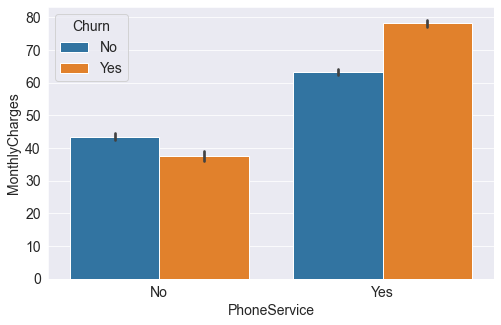

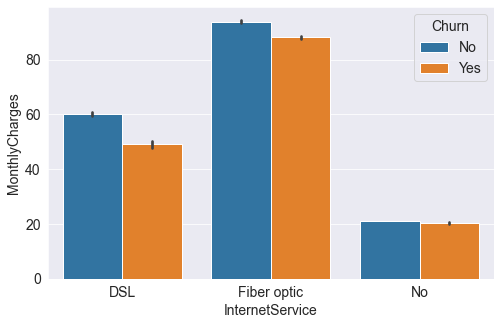

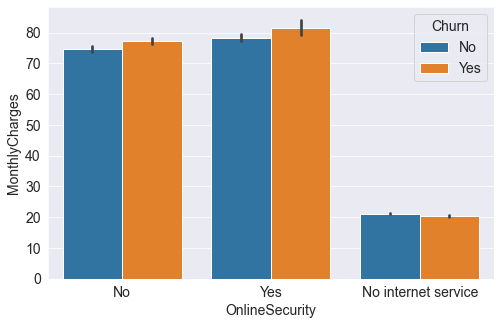

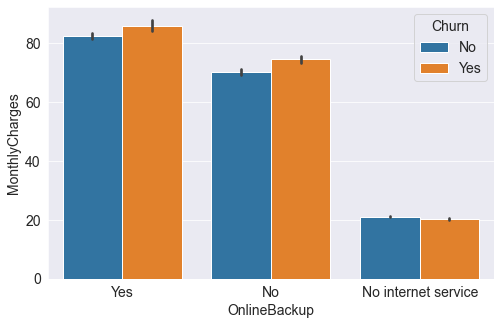

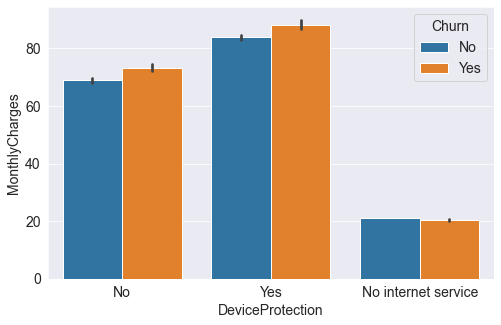

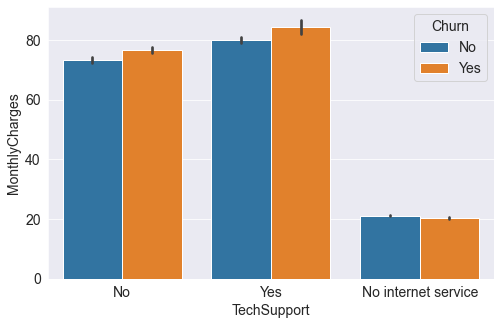

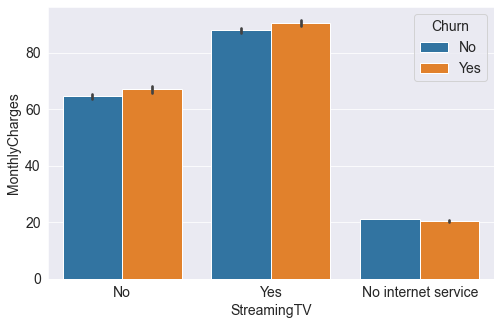

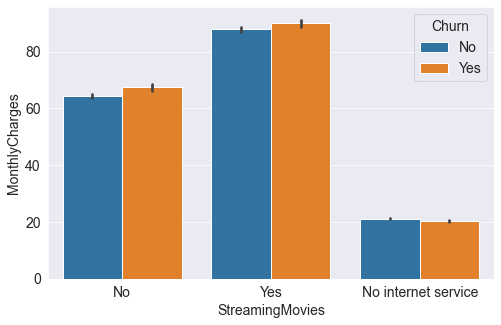

In [45]:
for col in ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
        plt.figure(figsize=(8,5))
        sns.barplot(x=col, y='MonthlyCharges', hue='Churn', data=telco_data, palette="tab10")
        plt.show()

In [46]:
telco_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0, 0.5, 'No of subscribers')

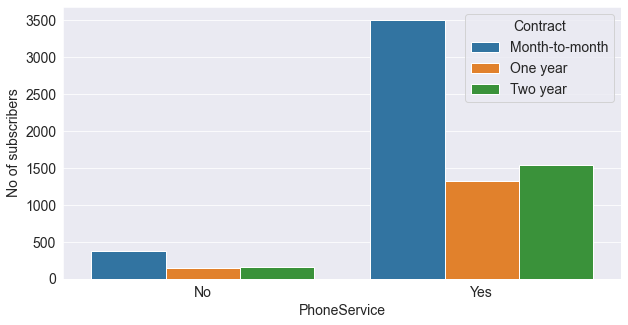

In [48]:
df_phone=telco_data.groupby(["PhoneService", "Contract"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.countplot(x="PhoneService", hue="Contract", data=telco_data)
plt.xlabel("PhoneService")
plt.ylabel("No of subscribers")

If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?
# Month to Month

# Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic = 20-35
ii. Plus = 70-89
iii. Premium =89-118

In [60]:
df3 = telco_data[['MonthlyCharges','Churn','Count']]
df3.groupby(['MonthlyCharges','Churn']).count().reset_index()


,MonthlyCharges,Churn,Count
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


In [50]:
df3['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0, 'MonthlyCharges')

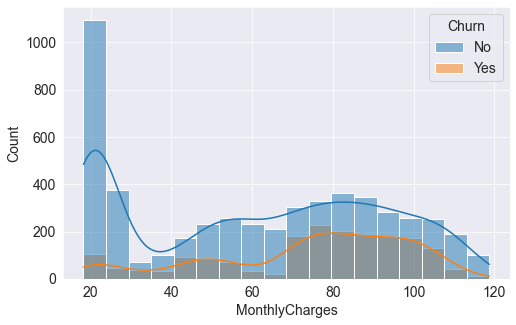

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(x="MonthlyCharges", hue ="Churn", data=df3, kde=True,)
plt.xlabel("MonthlyCharges")

Text(0, 0.5, 'No of subscribers')

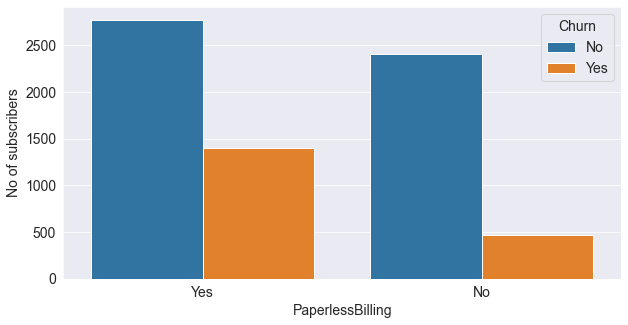

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=telco_data)
plt.xlabel("PaperlessBilling")
plt.ylabel("No of subscribers")

No the company should not go paparless as most subscribers who are on paperless billing are most likely to churn.
